<a href="https://colab.research.google.com/github/ZhuolunZhong/Tutorial-Graphing-a-semantic-network/blob/master/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The model and the code refers to the following URL

https://www.tensorflow.org/datasets/keras_example

https://github.com/eesgetdegrees/plot-cost-function-of-keras-model/tree/main

https://www.youtube.com/watch?v=wQ8BIBpya2k

https://www.youtube.com/watch?v=eU0FFjYumCI

The model is build to fit MNIST dataset for written number reconization. The input is array of numbers represent the location (28*28) and the color(0-255, 0=white,255=black) of the written number. The output is the written number (0-9).

For the better perfermance for training, the color number are normalized and cached. For randomness, the input pattern also used shuffle and batch.

Output pattern just follow the dataset as 0-9.

The model is trained with 2 hidden layers and each with 256 units.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## Build a training pipeline

In [4]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

## Check image

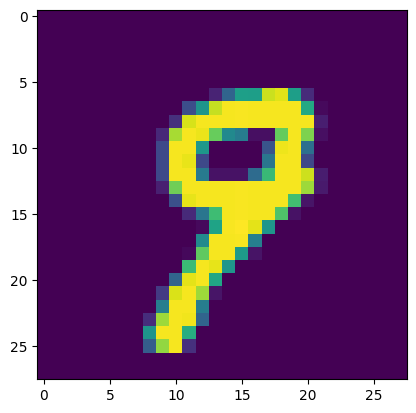

In [10]:
import matplotlib.pyplot as plt
plt.imshow(list(ds_train)[5][0][5])

## Build an evaluation pipeline

In [11]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create and train the model

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

mfit = model.fit(
    ds_train,
    epochs=15,
    validation_data=ds_test,
)

Epoch 1/15
469/469 [==============================] - 10s 18ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.1271 - val_sparse_categorical_accuracy: 0.9599
Epoch 2/15
469/469 [==============================] - 10s 21ms/step - loss: 0.1000 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.0898 - val_sparse_categorical_accuracy: 0.9717
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9797 - val_loss: 0.0803 - val_sparse_categorical_accuracy: 0.9743
Epoch 4/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9855 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9773
Epoch 5/15
469/469 [==============================] - 10s 21ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0721 - val_sparse_categorical_accuracy: 0.9773
Epoch 6/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0260 - sparse_c

## Plotting the learning trajectory and check the test accuracy

79/79 [==============================] - 0s 4ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9800


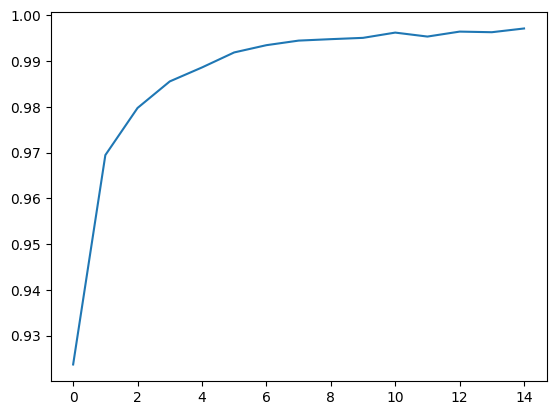

In [34]:
loss, acc = model.evaluate(ds_test)
plt.plot(mfit.history['sparse_categorical_accuracy'])

## Check the prediction

1/1 [==============================] - 1s 616ms/step


0

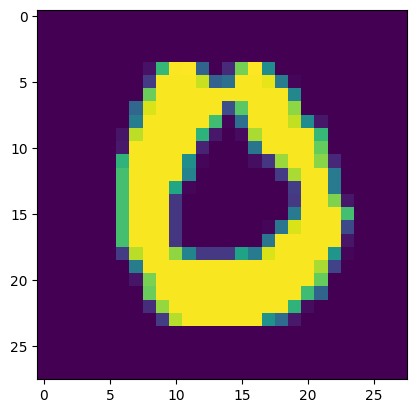

In [27]:
import matplotlib.pyplot as plt
plt.imshow(list(ds_test)[5][0][5])
import numpy as np
np.argmax(model.predict(np.array(list(ds_test)[5][0][5]).reshape(1, 28, 28)))